## _*LiH plot using ExactEigensolver*_

This notebook demonstrates using Qiskit Chemistry to plot graphs of the ground state energy and dipole moments of a Lithium Hydride (LiH) molecule over a range of inter-atomic distances.
   
This notebook has been written to use the PYSCF chemistry driver. 

In [1]:
import numpy as np
import pylab
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian

# Note: In order to allow this to run reasonably quickly it takes advantage
#       of the ability to freeze core orbitals and remove unoccupied virtual
#       orbitals to reduce the size of the problem. Freeze core can always
#       be used, but be very cautious when removing unoccupied orbitals.
#  

molecule = 'Li .0 .0 -{0}; H .0 .0 {0}'

start = 1.25 # Start distance
by    = 0.5  # How much to increase distance by
steps = 20   # Number of steps to increase by
energies  = np.empty(steps+1)
distances = np.empty(steps+1)
dipoles   = np.empty(steps+1)

print('Processing step __', end='')
for i in range(steps+1):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    d = start + i*by/steps 
    driver = PySCFDriver(molecule.format(d/2), basis='sto3g')
    qmolecule = driver.run()
    operator = Hamiltonian(freeze_core=True, orbital_reduction=[-3, -2])
    qubit_op, aux_ops = operator.run(qmolecule)
    result = ExactEigensolver(qubit_op, aux_operators=aux_ops).run()
    lines, result = operator.process_algorithm_result(result)
    distances[i] = d
    energies[i] = result['energy']
    dipoles[i]  = result['total_dipole_moment']
print(' --- complete')

print('Distances: ', distances)
print('Energies:', energies)
print('Dipole moments:', dipoles)

Couldn't find cython int routine
Couldn't find cython int routine
Processing step 20 --- complete
Distances:  [1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475 1.5   1.525
 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75 ]
Energies: [-7.86021175 -7.86413664 -7.86756329 -7.87052961 -7.87307044 -7.87521786
 -7.87700149 -7.87844868 -7.87958474 -7.88043316 -7.88101572 -7.88135266
 -7.88146285 -7.88136385 -7.88107204 -7.88060273 -7.8799702  -7.87918784
 -7.87826817 -7.87722291 -7.87606307]
Dipole moments: [1.85348096 1.85204573 1.85067375 1.84935828 1.84809268 1.84687002
 1.84568265 1.84452191 1.84337791 1.84223932 1.84109328 1.83992524
 1.83871893 1.8374563  1.83611747 1.83468076 1.83312267 1.83141785
 1.82953923 1.82745794 1.82514338]


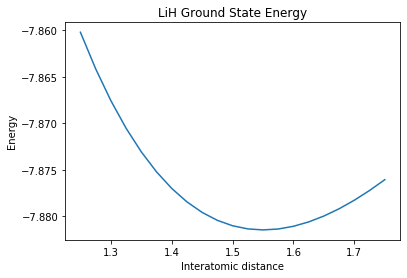

In [2]:
pylab.plot(distances, energies)
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('LiH Ground State Energy');

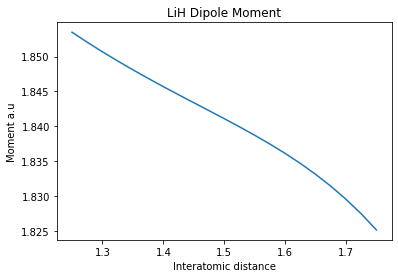

In [3]:
pylab.plot(distances, dipoles)
pylab.xlabel('Interatomic distance')
pylab.ylabel('Moment a.u')
pylab.title('LiH Dipole Moment');